In [1]:
import os
from PIL import Image
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import scipy.io.wavfile as wavfile
import scipy
from scipy import signal
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.display import Audio
from IPython import display
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter

import soundfile as sf           
from scipy.signal import welch   
from scipy.io import wavfile
import scipy.signal as sps
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
from sampling import module_functions
from IPython.display import Audio
from IPython import display
import torch.nn as nn
import torchvision
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as Fu

%matplotlib inline

In [2]:
def delta(n):
    if n==0:
        return 1
    else:
        return 0

In [3]:
_SAMPLE_DIR_IMG  = "image_data"
img_path = os.path.join(_SAMPLE_DIR_IMG, "LTI.png")
os.makedirs(_SAMPLE_DIR_IMG, exist_ok=True)

_SAMPLE_DIR_IMG  = "image_data"
img_path2 = os.path.join(_SAMPLE_DIR_IMG, "respuesta_impulso.png")
os.makedirs(_SAMPLE_DIR_IMG, exist_ok=True)

# Representamos un sistema lineal e invariante en tiempo discreto (LTI) 

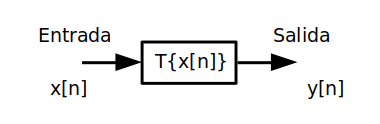

In [4]:
display.Image(img_path, width="400")

> Acústicamente, si ingresa una señal de audio original <span style="color:red">**(señal limpia)**</span> $x[n]$, al sistema, éste la transformará $T\big\{\cdot\big\}$ en una nueva señal, a la cual le va a otorgar ciertas características acústicas. Esa nueva señal se denomina <span style="color:red">**señal convolucionada**</span> $y[n]$. 

$$
\begin{align*}
y[n] &= T\big\{x[n]\big\}
\end{align*}
$$

> O, bien equivalentemente,

$$
\begin{align*}
x[n] \xrightarrow[]{T}y[n]
\end{align*}
$$

> Esta representación, nos permite estimar una salida del sistema a través de una operación matemática llamada <span style="color:red">**suma de convolución**</span>.

## Respuesta impulso de un sistema

> Conceptualmente, la respuesta impulso del sistema es llamada $h[n]$. Corresponde a la salida del sistema cuando en la entrada hay un impulso unitario, también conocido como <span style="color:red">**impulso de Dirac**</span> $\delta [n]$:

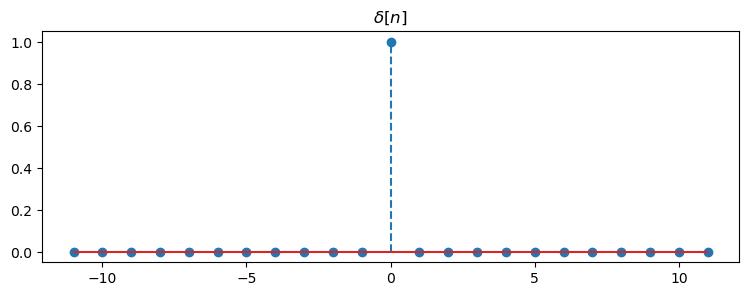

In [5]:
imp_ = []
n = 11
for i in range(-n, n+1):
    imp = delta(i)
    imp_.append(imp)

plt.figure(figsize=(9,3))
plt.title('$\delta [n]$')
plt.stem(range(-n,n+1), imp_, '--');    

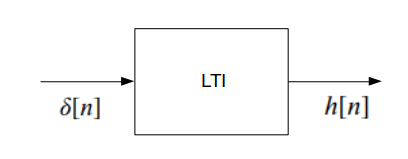

In [6]:
display.Image(img_path2, width="400")

$$
\begin{align*}
\delta[n] \xrightarrow[]{T}h[n]
\end{align*}
$$
    
$$
\begin{align*}
\hspace{0.15cm} \delta[n - k] \xrightarrow[]{T}h[n - k]
\end{align*}
$$ 
    
$$
\begin{align*}
\hspace{0.15cm} x[k] \delta[n - k] \xrightarrow[]{T} x[k] h[n - k]
\end{align*}
$$     
    
$$
\begin{align*}
\hspace{0.15cm} \sum_{k=-\infty}^{\infty} x[k] \delta[n - k] \xrightarrow[]{T} \sum_{k=-\infty}^{\infty} x[k] h[n - k]
\end{align*}
$$
    
$$
\begin{align*}
\hspace{0.15cm} x[n] \xrightarrow[]{T} y[n]
\end{align*}
$$ 
    
> Por lo tanto, por definición la suma de convolución es:
$$
\begin{align*}
\hspace{0.15cm} y[n] =   \sum_{k=-\infty}^{\infty} x[k] h[n - k] = x[n]*h[n], \quad {\text{para cualquier sistema LTI.}}
\end{align*}
$$     
    


In [7]:
from IPython.display import Video
Video("./video_convol.mp4", width=820, height=820)